# < 3주차 과제 1 : MLP 마음대로 다뤄보기>
- dataset을 임의로 선정해서 직접 분석 해보기(제공한 코드를 활용해서 해보기)
- activation functions 중 relu사용시 함수 직접 정의
- lr, optimizer 등 바꿔보기
- hidden layer/neuron 수를 바꾸기
- 전처리도 추가
- 모든 시도를 올려주세요!
- 제일 높은 acc를 보인 시도를 명시해주세요!


In [ ]:
import torch
from torch import nn, optim
from sklearn.datasets import load_wine
from torch.utils.data import  TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

## 아래 데이터셋 중 원하는 데이터셋 하나를 선택하여, 코드 과제 진행하기!
- 1) load_digits() <br>
- 2) load_wine()

In [ ]:
# 데이터셋 종류 :
wine = load_wine()

In [ ]:
input = wine.data
output = wine.target

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == "cuda":
  torch.cuda.manual_seed_all(777)

In [ ]:
input

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [ ]:
output

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
#데이터 칼럼
wine['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
#샘플 수 178개, class는 0,1,2

In [ ]:
# #y를 카테고리화
# output = pd.get_dummies(output)
# output

In [ ]:
# import torch.nn.functional as F

# #원핫 인코딩
# output=F.one_hot(output,num_classes=3)
# output
###케라스에서는 라벨 원핫 인코딩을 하는데 파이토치도 하는 건지,,

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(input, output, test_size = 0.3, random_state = 42, stratify= wine.target, shuffle = True)

x_train = torch.FloatTensor(x_train).to(device)
y_train = torch.LongTensor(y_train).to(device)
x_test = torch.FloatTensor(x_test)
y_test = torch.LongTensor(y_test)

# 데이터를 tensor로 바꿔주고 gpu 연산이 가능해지도록 gpu에 옮김
# label 값을 왜 long 에 옮겨놓는가? loss function이 다르기 때문

In [ ]:
print(x_train[0])

tensor([1.3750e+01, 1.7300e+00, 2.4100e+00, 1.6000e+01, 8.9000e+01, 2.6000e+00,
        2.7600e+00, 2.9000e-01, 1.8100e+00, 5.6000e+00, 1.1500e+00, 2.9000e+00,
        1.3200e+03])


In [ ]:
print(y_train.unique())

tensor([0, 1, 2])


파이토치에서는 데이터셋을 좀 더 쉽게 다룰 수 있도록 유용한 도구로서 torch.utils.data.Dataset과 torch.utils.data.DataLoader를 제공합니다. 이를 사용하면 미니 배치 학습, 데이터 셔플(shuffle), 병렬 처리까지 간단히 수행할 수 있습니다. 기본적인 사용 방법은 Dataset을 정의하고, 이를 DataLoader에 전달하는 것
- init : class 에서 객체가 생성되면 바로 실행되는 함수
- len : observation 수를 정의하는 함수
- getitem : iteration 마다 해당하는 데이터를 돌려주는 함수

In [ ]:
from torch.utils.data import Dataset
class CustomDataset(Dataset):
  def __init__(self):
    self.x_data = x_train
    self.y_data = [[y] for y in y_train]
    self.device = device
#  데이터셋의 전처리를 해주는 부분
    self.x_data = self.standardize(self.x_data)

  def standardize(self, data):
          #각 feature의 평균과 표준편차를 이용하여 표준화하는 함수
          mean = torch.mean(data, dim=0)
          std = torch.std(data, dim=0)
          standardized_data = (data - mean) / std
          return standardized_data

  def __len__(self):
    return len(self.x_data)
#  데이터셋의 길이. 즉, 총 샘플의 수를 적어주는 부분

  def __getitem__(self, idx):
    x = torch.FloatTensor(self.x_data[idx]).to(self.device)
    y = torch.LongTensor(self.y_data[idx]).to(self.device)
#  데이터셋에서 특정 1개의 샘플을 가져오는 함수

    return x,y

In [ ]:
batch_size = 8

dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=batch_size)

In [ ]:
# input_layer와 hidden_layer의 노드 개수를 어떻게 바꿔줘야할까?
# hidden layer/neuron 수를 바꾸기

model = nn.Sequential(
          nn.Linear(13,398, bias=True),
          nn.ReLU(),
          nn.Linear(398,15, bias=True),
          nn.ReLU(),
          nn.Linear(15,3, bias=True),
          nn.Softmax(dim=1)
          ).to(device)

class로 구현 가능
- init : 초기 생성 함수
- foward : 순전파(입력값 => 예측값 의 과정)

In [ ]:
#relu 구현
class Relu(torch.nn.Module):
    def forward(self, x):
        return torch.max(torch.tensor(0.0), x)

class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(13, 398, bias=True), # input_layer = 13, hidden_layer1 = 398
            Relu(),
            nn.BatchNorm1d(398)
        )
        self.layer2 = nn.Sequential(
            nn.Linear(398, 15, bias=True),
            Relu()
        )
        self.layer3 = nn.Sequential(
            nn.Linear(15, 10, bias=True),
            Relu()
        )
        self.layer4 = nn.Sequential(
            nn.Linear(10, 3, bias=True),
            nn.Softmax()
        )

 # activation function 이용
  #   nn.ReLU()
  #   nn.tanH()
  #   https://pytorch.org/docs/stable/nn.html 그 외에도 여기서 확인 가능함
  #   파라미터가 필요하지 않다는 것이 특징

  # batch normazliation 1d, 파라미터 값으로 vector의 길이를 전해줌
  # 추후에 이미지를 다루게 된다면, 그때는 batch normalization 2d를 이용하게 됨
  # 그때는 파라미터 값으로 채널, 가로, 세로 길이를 전달해주게 됨


    def forward(self, x):
        output = self.layer1(x)
        output = self.layer2(output)
        output = self.layer3(output)
        output = self.layer4(output)
        return output

In [ ]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform(layer.weight)
        layer.bias.data.fill_(0.01)

        #xavier사용
        # Layer의 weight를 어떤 분포를 가지도록 초기화시켜줌+global minimum찾기 위해서

In [ ]:
model = Model().to(device)
model.apply(init_weights)

<ipython-input-22-6196a47a4462>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=398, bias=True)
    (1): Relu()
    (2): BatchNorm1d(398, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=398, out_features=15, bias=True)
    (1): Relu()
  )
  (layer3): Sequential(
    (0): Linear(in_features=15, out_features=10, bias=True)
    (1): Relu()
  )
  (layer4): Sequential(
    (0): Linear(in_features=10, out_features=3, bias=True)
    (1): Softmax(dim=None)
  )
)

In [ ]:
print(model)

Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=398, bias=True)
    (1): Relu()
    (2): BatchNorm1d(398, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=398, out_features=15, bias=True)
    (1): Relu()
  )
  (layer3): Sequential(
    (0): Linear(in_features=15, out_features=10, bias=True)
    (1): Relu()
  )
  (layer4): Sequential(
    (0): Linear(in_features=10, out_features=3, bias=True)
    (1): Softmax(dim=None)
  )
)


In [ ]:
loss_fn  = nn.CrossEntropyLoss().to(device)

# 여러가지 optimizer 시도해보기
# lr 바꿔보기

optimizer = optim.Adagrad(model.parameters(), lr= 0.01)
#optimizer = optim.Adam(model.parameters(), lr= 0.01)
#optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
#optimizer = optim.Adadelta(model.parameters(), lr=0.03)

# https://pytorch.org/docs/stable/optim.html#module-torch.optim 페이지 참조
# optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
# sgd 등등

In [ ]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # 비용 함수
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


0 0.9692224860191345
10 0.79714035987854
20 0.7350306510925293
30 0.6505707502365112
40 0.6190946698188782
50 0.5871148705482483
60 0.5762291550636292
70 0.5930455327033997
80 0.5880704522132874
90 0.5721447467803955


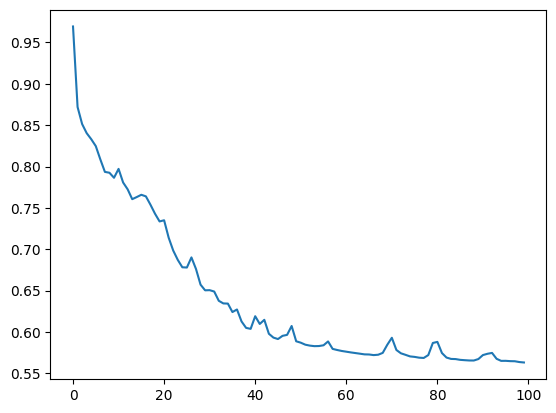

In [ ]:
plt.plot(losses)
plt.show()

In [ ]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().cpu().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))

In [ ]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [0.99676466 0.00221027 0.00102507]
argmax를 한 후의 output은 0
accuracy는 0.9444444444444444


# < 3주차 과제 2 : CNN 맛보기>

In [31]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn # 신경망들이 포함됨
import torch.nn.functional as F
import torch.optim as optim # 최적화 알고리즘들이 포함됨
from torchvision import datasets, transforms # 이미지 데이터셋 집합, 이미지 변환 툴
from torch.autograd import Variable

In [32]:
# Training settings
batch_size = 64

# MNIST Dataset
train_dataset = datasets.MNIST(root='./data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./data/',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
#앞서 정의한 데이터셋을 DataLoader에 넣으면 정의한 조건(배치 사이즈 등)에 따라 모델을 학습하고 추론할 때 데이터를 load 해줌
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 98109373.84it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 74545042.35it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 27945705.43it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 10220240.76it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [33]:
# 첫번째 이미지만 가져오기
img , label = next(iter(train_loader))

In [34]:
img.shape

torch.Size([64, 1, 28, 28])

In [35]:
#배치 크기 × 채널 × 높이(height) × 너비(widht)
#총 64개의 샘플, 흑백이므로 채널 1, 가로 세로 28픽셀

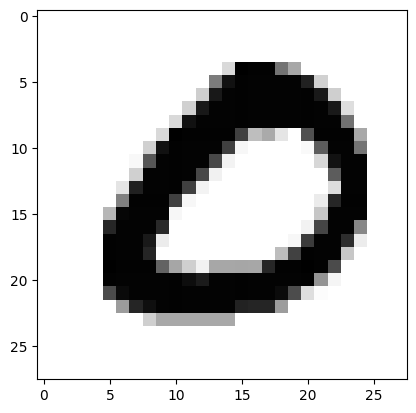

In [36]:
#한 개의 이미지만 출력해보기
img_show = img[0, 0, :, :]    #배치 크기, 채널 0으로 만듦
img_show.shape

plt.imshow(img_show, cmap='Greys')
plt.show()

Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0)의 파라미터

*   in_channels: 입력 채널 수. 흑백 이미지일 경우 1, RGB 값을 가진 이미지일 경우 3 을 가진 경우가 많음
*   out_channels: 출력 채널 수
*   kernel_size: 커널 사이즈(필터 사이즈)
*   stride: kernel을 적용하는 간격. 간격이 커질수록 출력 데이터 배열의 크기는 작아짐. 기본 값은 1
*   padding: 출력 데이터 배열의 크기를 조정하기 위해서 이미지의 주변을 채워줌. 패딩 사이즈 기본 값은 0



In [37]:
#가로 28x세로 28 = 784 픽셀로 이루어진 이미지
#각 픽셀은 밝기 정도에 따라 0부터 255까지 등급을 매김
#흰 배경이 0, 글씨가 있는 곳은 1~255 숫자 중 하나로 채워져, 긴 행렬로 이루어진 하나의 집합으로 변환됨

**output size 계산**

*   {input size - kernel size + (2*padding)} / stride +1
*   우리가 가진 데이터에서 입력 이미지는 28x28 픽셀, conv1(1, 10, 5)일 때 output layer
   *  ((28 - 5) + (2*0)) / 1 + 1 = 24
   *  output size는 24x24



In [39]:
#CNN class 정의
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()   # super함수는 CNN class의 부모 class인 nn.Module을 초기화
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=10, kernel_size = 5)
        #합성곱 레이어1 : 입력 크기는 28x28x1 -> 출력 크기는 24x24x10 =>맥스 풀링(/2)을 거쳐 12x12x10로 변환
    self.conv2 = nn.Conv2d(in_channels=10, out_channels=20, kernel_size = 5)
        #합성곱 레이어2 : 입력 크기는 12x12x10 -> 출력 크기는 8x8x20 =>맥스 풀링을 거쳐 4x4x20
    self.mp = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        #맥스풀링 레이어 : 픽셀값을 절반으로 나눠줌
    self.fc = nn.Linear(4*4*20, 10) ### : 알맞는 input
        #입력 크기 320, 출력 클래스 수는 10(0~9까지 숫자 맞히기)
        #입력층과 출력층 사이에 선형 변환 수행(입력 벡터를 받아서 가중치 행렬과의 행렬 곱 계산, bias 더해줌)

  def forward(self, x):
    in_size = x.size(0)
    x = F.relu(self.mp(self.conv1(x)))
      #첫 번째 합성곱 계층을 통과한 후 ReLU 활성화 함수를 적용하고, 그 결과를 최대 풀링 계층에 통과시킴
    x = F.relu(self.mp(self.conv2(x)))
      #두 번째 합성곱 계층을 통과...
    x = x.view(in_size, -1)       #출력을 1차원으로 평탄화
    x = self.fc(x)    #평탄화된 출력에 완전 연결 계층을 적용하여 클래스에 대한 로그 확률을 계산
    return F.log_softmax(x)   #로그 소프트맥스 함수를 적용하여 각 클래스에 대한 예측값을 확률 값으로 반환

    ##https://kh-kim.github.io/nlp_with_deep_learning_blog/docs/1-13-deep_neural_networks_ii/05-softmax_and_cross_entropy/
    ##지수함수를 사용하는 소프트맥스의 특성상, 로그소프트맥스가 좀 더 빠른 연산 속도를 제공할 수 있기 때문에 후자가 좀 더 선호되는 편이라고,,
    ##로그 소프트맥스 사용할 때는 NLL 손실 함수 사용해줘야 함

**완전연결 계층**

*   Fully conneted layer, Dense layer
*   '완전 연결되었다' : 한 layer의 모든 뉴런이 다음 layer의 모든 뉴런과 연결된 상태. 1차원 배열의 형태로 평탄화된 행렬을 통해 이미지를 분류하는 데 사용되는 계층
*   2차월 벡터의 행렬을 1차원 배열로 평탄화, relu 함수로 활성화, softmax 함수로 이미지 분류하는 것까지가 fully connected layer라고 함



**pooling**

*   컨볼루션 층을 통해 이미지 특징을 요약하여도, 그 결과가 여전히 크고 복잡하면 이를 다시 한번 축소함 (pooling/sub sampling)
*   정해진 구역 안에서 최댓값을 뽑아내는 max pooling, 평균값을 뽑아내는 average pooling 등


**drop out**

*   은닉층에 배치된 노드 중 일부를 임의로 꺼주는 것. 특정 노드에 지나치게 치우쳐서 학습되는 과적합 방지
*   매 학습이 일어날 때마다 일정한 수의 다른 노드가 랜덤하게 학습에서 배제됨

In [40]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

In [41]:
def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)   #데이터와 타겟을 Variable로 변환하여 GPU에서 연산할 수 있도록 함
    optimizer.zero_grad()   #기울기를 초기화
    output = model(data)    #모델에 데이터를 입력
    loss = F.nll_loss(output, target)     #예측값과 실제값 사이의 손실 계산
    loss.backward()         #역전파를 통해 파라미터 기울기 계산
    optimizer.step()        #옵티마이저로 파라미터 업데이트
    if batch_idx % 10 == 0:   #현재 미니배치의 인덱스가 10의 배수일 때마다 아래 코드 블록을 실행
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))
          #에포크, 미니배치 인덱스, 전체 데이터셋 크기, 현재 미니배치의 손실을 출력

**model.eval()**

*   모델의 모든 레이어가 evalutaion mode에 들어가도록 해줌 -> 학습할 때만 필요했던 drop out, batch norm 등의 기능을 추론할 때는 비활성화시킴
    * 메모리와는 관련이 없다고
*   torch.no_grad() : gradient 계산을 비활성화 함으로써 gradient를 더이상 트래킹하지 않음. 메모리가 줄어들고 연산 속도가 증가함

In [42]:
def test():
    model.eval() #model.eval() 의 기능은?
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        #역전파 단계에서 그래디언트가 계산되지 않음, 메모리 절약하기 위해 사용 -> 최신 버전 파이토치에서는 with torch.no_grad()를 사용한다고..
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy loss와의 관계 확인!
        #size_average=False로 설정하여 각 배치의 손실 합을 구함
        pred = output.data.max(1, keepdim=True)[1]
        #각 입력 샘플에 대한 예측 저장
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()
        #예측값과 실제 타겟을 비교하여 올바른 예측수 계산

    test_loss /= len(test_loader.dataset)
      #테스트 손실을 전체 테스트 데이터셋의 크기로 나누어 평균 손실을 계산
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))   #평균 손실과 정확도 출력함

**null_loss**


*   음의 로그 우도(Negative Log Likelihood) 손실을 계산하는 손실 함수. 로그 소프트맥스(log softmax) 출력을 사용
*   torch.nn.CrossEntropyLoss : nn.LogSoftmax와 nn.NLLLoss의 연산의 조합


https://supermemi.tistory.com/entry/Loss-Cross-Entropy-Negative-Log-Likelihood-%EB%82%B4%EC%9A%A9-%EC%A0%95%EB%A6%AC-Pytorch-Code
1.    NLLLoss 안에서는 softmax나 log함수가 이뤄지지 않습니다. 그래서 모델 output(raw data)을 input으로 그대로 사용하는 것이 아니라 LogSoftmax 함수를 적용한 후 input으로 사용해야합니다.
2.   CrossEntropyLoss 안에서 LogSoftmax와 Negative Log-likelihood 가 진행되기 때문에 softmax나 log 함수가 적용되지 않은 모델 output(raw data)을 input으로 주어야 합니다.





In [43]:
for epoch in range(1, 10):
    train(epoch)
    test()

<ipython-input-39-59477b7fa2b5>:23: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)   #로그 소프트맥스 함수를 적용하여 각 클래스에 대한 예측값을 확률 값으로 반환


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.300726
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.273365
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.251930
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.232374
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.176073
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.193516
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.114929
Train Epoch: 1 [4480/60000 (7%)]	Loss: 1.945692
Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.896105
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.576200
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.396972
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.091363
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.931685
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.834722
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.689583
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.619575
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.486502
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.568944
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.434625
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.421943
Train Epoch: 1 [12800/60000 (

<ipython-input-42-daccfb86f72c>:6: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.10/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 0.1807, Accuracy: 9458/10000 (95%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.149874
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.158970
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.120138
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.218476
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.229115
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.405875
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.221780
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.304464
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.265579
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.258661
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.254684
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.198440
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.116211
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.292966
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.243772
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.154295
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.173079
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.122388
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.289004
Train Epoch: 2 [12